2. (M/D) Comparar um conjunto de algoritmos de aprendizado de máquina (pelo menos cinco)
em aplicações relacionadas ao seu projeto ou alguma outra aplicação real sugerida por você.
Neste caso, espera-se que a aplicação seja útil e conte com uma base de dados interessante
e de tamanho que permita a aplicação de algoritmos de aprendizado de máquina.

# Coleta de Dados

### https://www.kaggle.com/datasets/shaz13/real-world-documents-collections

In [65]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

In [66]:
# https://github.com/kaiomudkt/projeto_Machine_Learning/blob/main/ETL_download_dataset_kaggle.py
from ETL_download_dataset_kaggle import get_dataset

path_dataset_base: str = "dataset/real_world_documents_collections"
path_dataset: str = f"{path_dataset_base}/docs-sm"
link_kaggle_dataset = 'shaz13/real-world-documents-collections'
path_zip: str = "./dataset/compactados"
zip_file_name: str = f'{path_zip}/real-world-documents-collections.zip'
# obtem o dataset para poder ser processado
get_dataset(zip_file_name, link_kaggle_dataset, path_zip, path_dataset_base)
print('Download do dataset já foi concluido.')

Arquivo ./dataset/compactados/real-world-documents-collections.zip descompactado com sucesso em dataset/real_world_documents_collections
Download do dataset já foi concluido.


In [67]:
# https://github.com/kaiomudkt/projeto_Machine_Learning/blob/main/ETL_process_image.py
from ETL_process_image import process_dataset, draw_bounding_boxes

required_folders_classes: dict = {'form': 0, 'resume': 1, 'letter': 2, 'invoice': 3, 'questionnaire': 4}
path_df_parquet: str = './DF_shaz13_real_world_documents_collections_V4.parquet'
# processa o dataset de imagens, extraindo textos via OCR e limpando os texto para poder usar no Aprendizado de Máquina
df = process_dataset(f'./{path_dataset}', path_df_parquet, required_folders_classes)
df.columns

Index(['text', 'class_img', 'name', 'dict_ocr', 'class_number'], dtype='object')

# Análise Exploratória de Dados (EDA)

In [68]:
df.columns

Index(['text', 'class_img', 'name', 'dict_ocr', 'class_number'], dtype='object')

In [69]:
print(df.head(5))

                                                text      class_img  \
0  bellomycarrigginc job university parkway aa ex...  questionnaire   
1  inc broadway york screening questionnatre time...  questionnaire   
2                                               ozle  questionnaire   
3  alan november account smoking manufacture desc...  questionnaire   
4  market monttor office use interviewer resp res...  questionnaire   

                      name                                           dict_ocr  \
0  505527865_505527879.jpg  {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2...   
1    89583564_89583573.jpg  {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...   
2  503543120_503543128.jpg  {'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3...   
3            501525861.jpg  {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2...   
4             71224770.jpg  {'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2...   

   class_number  
0             4  
1             4  
2             4  
3             

# Limpeza dos Dados

In [70]:
# Substitui strings vazias por NaN
df['text'] = df['text'].replace('', np.nan)
# Conta o número de valores NaN na coluna 'text'
num_nan = df['text'].isna().sum()
print(f'Quantidade de linhas vazias: {num_nan}')

Quantidade de linhas vazias: 206


In [71]:
# Remove linhas onde a coluna 'text' está NaN
df = df.dropna(subset=['text'])
num_nan = df['text'].isna().sum()
print(f'Quantidade de linhas vazias após a remoção: {num_nan}')

Quantidade de linhas vazias após a remoção: 0


In [72]:
def text_smaller_than(df, amount: int):
    # Filtrar linhas onde a string na coluna 'text' tem menos de 'amount' caracteres
    short_text_rows = df[df['text'].str.len() < amount]
    # Contar o número de tais linhas
    num_short_text_rows = short_text_rows.shape[0]
    return num_short_text_rows
amount: int = 5
num_short_text_rows = text_smaller_than(df, amount)
print(f'Quantidade de textos que é menor que {amount} caracteres: {num_short_text_rows}')

Quantidade de textos que é menor que 5 caracteres: 48


In [73]:
# Remover as linhas onde a string na coluna 'text' tem menos de 'amount' caracteres
df_filtered = df[df['text'].str.len() >= amount]
df = df_filtered
num_short_text_rows = text_smaller_than(df, amount)
print(f'Quantidade de textos que é menor que {amount} caracteres: {num_short_text_rows}')


Quantidade de textos que é menor que 5 caracteres: 0


### Analisar classes (target) do df

In [74]:
# Conta a quantidade de linhas que têm o mesmo valor na coluna 'class_img'
class_img_counts = df['class_img'].value_counts()
print(f'Quantidade imagens de cada classe: {class_img_counts}')

Quantidade imagens de cada classe: class_img
resume           606
form             598
letter           594
invoice          552
questionnaire    534
Name: count, dtype: int64


/tmp/ipykernel_9059/1263128678.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


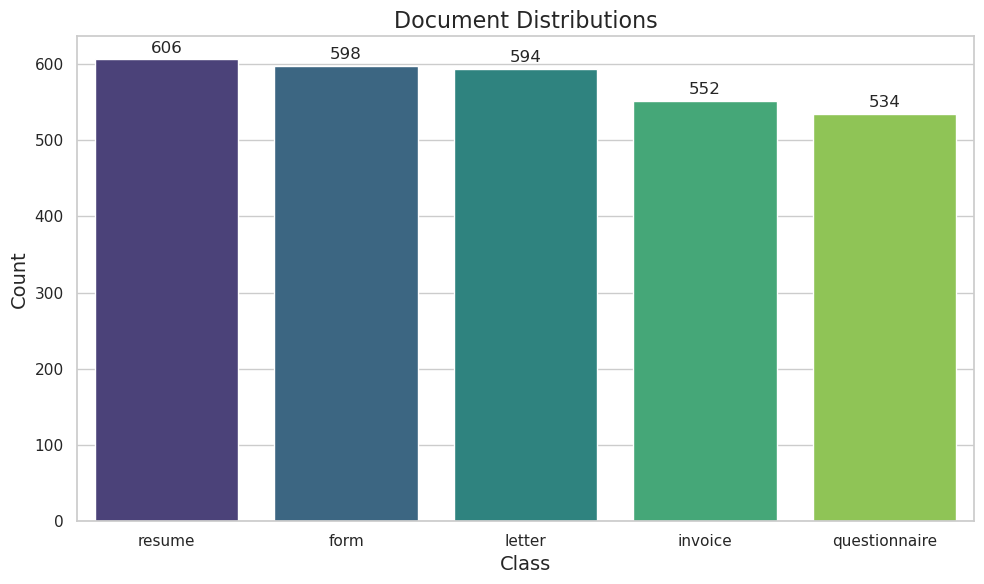

In [75]:

# Contar as ocorrências de cada classe
class_counts = df['class_img'].value_counts()

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Adicionar anotações sobre as barras
for i, value in enumerate(class_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12)

# Adicionar título e rótulos dos eixos
plt.title("Document Distributions", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Nivelando aleatóriamente a quantidade de imagens de cada classe para ficar do mesmo tamanho que a menor

In [76]:
# Define o número de linhas que cada classe deve ter
min_class_count = class_img_counts.min()
# Amostra aleatória de cada classe para ter a mesma quantidade que a menor classe
balanced_df = df.groupby('class_img').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)
# Verifica a quantidade de linhas em cada classe no DataFrame balanceado
balanced_class_img_counts = balanced_df['class_img'].value_counts()
df = balanced_df
print(f'Quantidade de imagens em cada classe após balanceamento: \n{balanced_class_img_counts}')

Quantidade de imagens em cada classe após balanceamento: 
class_img
form             534
invoice          534
letter           534
questionnaire    534
resume           534
Name: count, dtype: int64


/tmp/ipykernel_9059/2612964233.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('class_img').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)


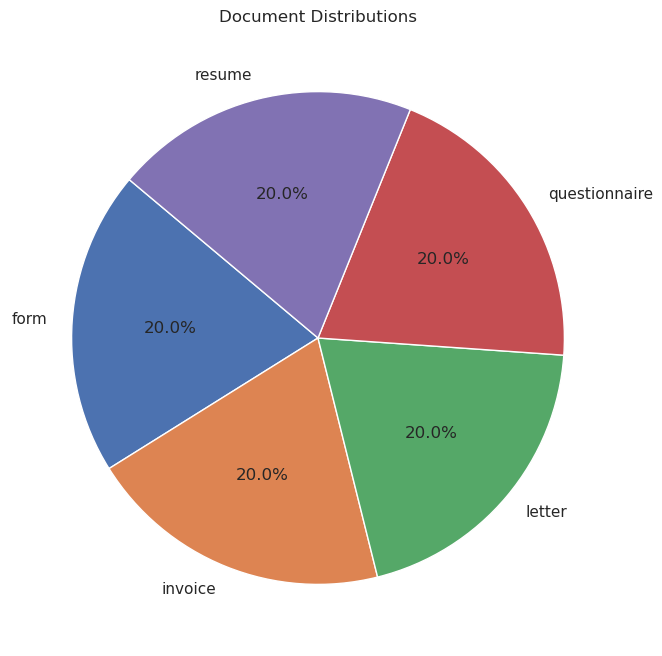

In [77]:
# Contar as ocorrências de cada classe
class_counts = df['class_img'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Document Distributions")
plt.show()

In [78]:
print(df.head(5))

                                                text class_img  \
0  é blologische forschung div mit bestimmung der...      form   
1  dorsey whitney llp south sixth street minneapo...      form   
2  boor fax facsimile cover sheet company phone f...      form   
3  vertragsforschung datum dr rustemeier marc de ...      form   
4  purchase requisition reqdate name sonya total ...      form   

             name                                           dict_ocr  \
0  2028716988.jpg  {'block_num': [0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2...   
1  2075066999.jpg  {'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2...   
2  2074586817.jpg  {'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2...   
3  2505163123.jpg  {'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2...   
4  2080958385.jpg  {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2...   

   class_number  
0             0  
1             0  
2             0  
3             0  
4             0  


### Lista de palavras que são consideradas stopwords (palavras vazias) para o idioma inglês. 

In [79]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))

def check_for_stopwords(text: str, stopwords_list: List[str]) -> List[str] | None:
    """
    Função para verificar se há stopwords em uma string
    """
    # Dividir a string em palavras
    words = text.split()
    # Verificar se há interseção entre as palavras e as stopwords
    stopwords_in_text = set(words) & stopwords_list
    if stopwords_in_text:
        return list(stopwords_in_text)  # Retorna lista de stopwords encontradas
    else:
        return None  # Retorna None se não há stopwords
# Aplicar a função check_for_stopwords à coluna 'text' e armazenar as stopwords encontradas
df['has_stopwords'] = df['text'].apply(lambda x: check_for_stopwords(x, stopwords_list))
# Filtrar o DataFrame para incluir apenas linhas onde 'has_stopwords' não é None
filtered_df = df[df['has_stopwords'].notna()]
# Exibir índice da linha, texto original e has_stopwords não vazio
for index, row in filtered_df.iterrows():
    print(f"Índice da linha: {index}")
    print(f"Texto original: {row['text']}")
    print(f"has_stopwords: {row['has_stopwords']}")
    print()  # Linha em branco para separar os resultados

Índice da linha: 18
Texto original: herbert february vice president public policy winstonsalem m pauline crumpton greco junior high school e fowler avenue temple terrace fl dear m crumpton thank interest youth nonsmoking material table card booklet ordered enclosed poster sent separately poster placed classroom school bulletin board location student see table card placed desk cafeteria table etc two booklet designed used parent adult talking kid peer pressure peer influence use counselor interested teacher might also want give copy parent group leader provide additional copy parent group interest quantity booklet requested however reduced developed use adult rather distribution student interest hope material helpful effort persuade young people smoke herbert osmon enclosure smoker
has_stopwords: ['m']

Índice da linha: 74
Texto original: certificate insurance confers right upon certificate holder certificate johnson higgins amend extend alter coverage afforded broad street company affo

In [80]:
df['has_stopwords'].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
2665    False
2666    False
2667     True
2668     True
2669    False
Name: has_stopwords, Length: 2670, dtype: bool

## Analisando a imagem

dataset/real_world_documents_collections/docs-sm/questionnaire/0000002206.jpg


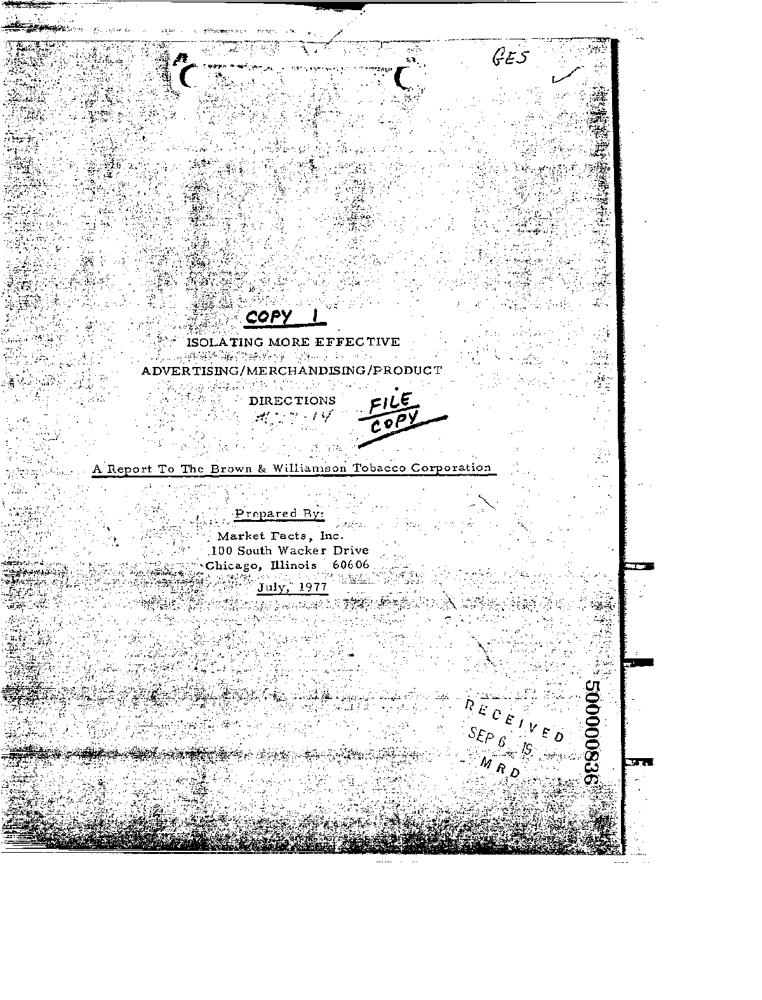

In [81]:
from PIL import Image
class_img = 'questionnaire'
name_img = '0000002206.jpg'
# dataset/real_world_documents_collections/docs-sm/docs-sm/questionnaire/0000002206.jpg
print(f"{path_dataset}/{class_img}/{name_img}")
image = Image.open(f"{path_dataset}/{class_img}/{name_img}")
image

In [82]:
# Usar query para filtrar e iloc para pegar a primeira linha
filtered_row = df.query("class_img == @class_img and name == @name_img").iloc[0]
filtered_row

text             effective brown tobacco corporation market inc...
class_img                                            questionnaire
name                                                0000002206.jpg
dict_ocr         {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
class_number                                                     4
has_stopwords                                                 None
Name: 1701, dtype: object

In [83]:
# obtem a linha do DF onde essa imagem foi processada
ocr_df = pd.DataFrame(filtered_row['dict_ocr'])
ocr_df.columns

Index(['block_num', 'conf', 'height', 'left', 'level', 'line_num', 'page_num',
       'par_num', 'text', 'top', 'width', 'word_num'],
      dtype='object')

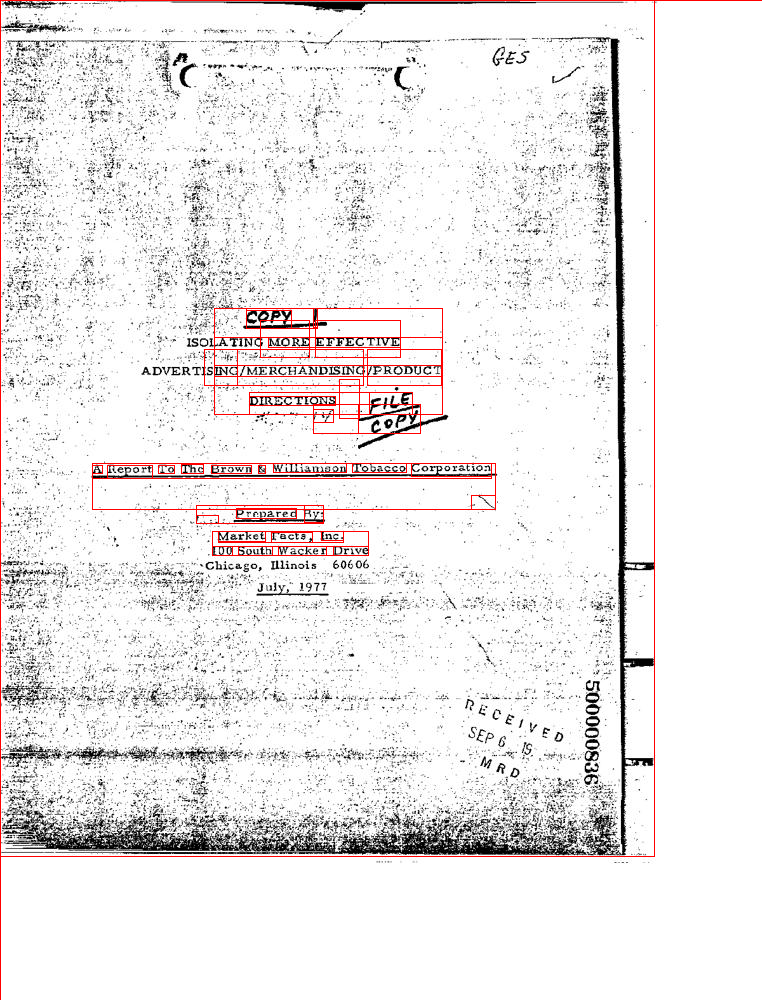

In [84]:
# 
image = draw_bounding_boxes(image, ocr_df)
image

# Separando os dados em treino e teste

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class_number'], test_size=0.2, random_state=678)

### Vetorizando dos dados

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Configurando o TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,5), max_df=0.95, min_df=2 ,max_features=10000)

In [87]:
# Ajustando e transformando os dados de treinamento
tfidf_train = tfidf.fit_transform(X_train)
# Convertendo a matriz esparsa em uma matriz densa
tfidf_test = tfidf.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Lista de modelos para comparar
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Ajuste de hiperparâmetros usando GridSearchCV

busca pela configuração ideal de parâmetros para cada modelo.

Definição de param_grids: Para cada modelo, definimos um dicionário de param_grid que contém os parâmetros que desejamos ajustar utilizando GridSearchCV. Os parâmetros específicos foram escolhidos com base na prática comum e podem ser ajustados conforme necessário.

Loop de Ajuste de Parâmetros: Iteramos sobre o dicionário models, que contém os modelos a serem testados. Para cada modelo, realizamos o ajuste de hiperparâmetros usando GridSearchCV.

GridSearchCV: Criamos um objeto GridSearchCV para cada modelo, onde especificamos o modelo, o param_grid correspondente, o número de folds para validação cruzada (cv=5 neste exemplo) e a métrica de avaliação (scoring='accuracy').

Execução da Busca em Grade: Chamamos o método fit() para executar a busca em grade no conjunto de treinamento (tfidf_train, y_train).

Armazenamento do Melhor Modelo: Após a busca em grade, armazenamos o melhor modelo encontrado (best_estimator_) no dicionário best_models.

Avaliação no Conjunto de Teste: Finalmente, avaliamos os melhores modelos encontrados no conjunto de teste (tfidf_test, y_test) e exibimos a acurácia para cada modelo.

In [89]:
# Definir os primeiros parâmetros para começar a testar em cada modelo
param_grid_logistic_regression = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_naive_bayes = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [3, 5, 10]
}

# Ajuste de Hiperparâmetros e Avaliação de Modelos

In [90]:
from sklearn.model_selection import GridSearchCV

# Dicionário de param_grids para cada modelo
param_grids = {
    'Logistic Regression': param_grid_logistic_regression,
    'Random Forest': param_grid_random_forest,
    'SVM': param_grid_svm,
    'Naive Bayes': param_grid_naive_bayes,
    'KNN': param_grid_knn,
    'Gradient Boosting': param_grid_gradient_boosting
}

# Lista para armazenar os melhores modelos ajustados
best_models = {}
def hyperparameter_tuning_and_model_evaluationa(best_models, models, param_grids, tfidf_train, y_train):
    # Executar GridSearchCV para cada modelo
    for name, model in models.items():
        print(f"Ajustando hiperparâmetros para {name} ...")
        # Definir o param_grid específico para o modelo atual
        param_grid: dict = param_grids[name]
        # Criar o objeto GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        # Executar a busca em grade no conjunto de treinamento
        grid_search.fit(tfidf_train, y_train)    
        # Armazenar o melhor modelo ajustado
        best_models[name] = grid_search.best_estimator_
        # Mostrar os melhores parâmetros encontrados
        print(f"Melhores parâmetros encontrados para {name}:")
        print(grid_search.best_params_)
        print()

    # Avaliar os melhores modelos no conjunto de teste e mostrar métricas
    print("\nAvaliação dos melhores modelos no conjunto de teste:")

    for name, model in best_models.items():
        # Avaliar o modelo no conjunto de teste
        accuracy = model.score(tfidf_test, y_test)
        print(f'{name}: Acurácia no teste = {accuracy:.4f}')

hyperparameter_tuning_and_model_evaluationa(best_models, models, param_grids, tfidf_train, y_train)

Ajustando hiperparâmetros para Logistic Regression ...


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase

Melhores parâmetros encontrados para Logistic Regression:
{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}

Ajustando hiperparâmetros para Random Forest ...
Melhores parâmetros encontrados para Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Ajustando hiperparâmetros para SVM ...
Melhores parâmetros encontrados para SVM:
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

Ajustando hiperparâmetros para Naive Bayes ...
Melhores parâmetros encontrados para Naive Bayes:
{'alpha': 0.1, 'fit_prior': False}

Ajustando hiperparâmetros para KNN ...
Melhores parâmetros encontrados para KNN:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Ajustando hiperparâmetros para Gradient Boosting ...
Melhores parâmetros encontrados para Gradient Boosting:
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}


Avaliação dos melhores modelos no conjunto de teste:
Logistic Regression: Acurácia no teste = 0.8596
Random Forest: Acurácia no teste = 0.850

- Seleção do Melhor Modelo: Escolha o modelo com o melhor desempenho nos dados de validação/teste.
- Retreinamento do Melhor Modelo: Retreine o modelo selecionado usando todos os dados disponíveis (conjunto de treinamento e teste combinados, se apropriado).
- Avaliação Final: Faça uma avaliação final do modelo em um conjunto de dados de teste ou validação separado, se disponível, para garantir que o modelo generaliza bem.
- Salvamento do Modelo: Salve o modelo treinado para uso futuro.
- Implantação: Implante o modelo em um ambiente de produção, onde ele pode ser usado para fazer previsões sobre novos dados.
- Monitoramento e Manutenção: Monitore o desempenho do modelo em produção e faça ajustes conforme necessário.

In [91]:
from sklearn.naive_bayes import GaussianNB
import joblib

def transform_text_data(tfidf, X_train, X_test):
    tfidf_train = tfidf.fit_transform(X_train).toarray()
    tfidf_test = tfidf.transform(X_test).toarray()
    return tfidf_train, tfidf_test

def initialize_models(best_params):
    models = {
        'Logistic Regression': LogisticRegression(**best_params['Logistic Regression']),
        'Random Forest': RandomForestClassifier(**best_params['Random Forest']),
        'SVM': SVC(**best_params['SVM']),
        'Naive Bayes': GaussianNB(var_smoothing=best_params['Naive Bayes']['alpha']),
        'KNN': KNeighborsClassifier(**best_params['KNN']),
        'Gradient Boosting': GradientBoostingClassifier(**best_params['Gradient Boosting'])
    }
    return models

def train_and_evaluate_models(models, tfidf_train, y_train, tfidf_test, y_test):
    best_model_name = None
    best_accuracy = 0
    for name, model in models.items():
        print(f"Treinando {name} ...")
        model.fit(tfidf_train, y_train)
        y_pred = model.predict(tfidf_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name}: Acurácia no teste = {accuracy:.4f}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name
    return best_model_name, best_accuracy

def retrain_best_model(best_model_name, models, tfidf, df):
    best_model = models[best_model_name]
    X_combined = tfidf.fit_transform(df['text']).toarray()
    best_model.fit(X_combined, df['class_img'])
    return best_model

def save_model_and_vectorizer(model, tfidf, model_filename, vectorizer_filename):
    joblib.dump(model, model_filename)
    joblib.dump(tfidf, vectorizer_filename)
    print(f'\nModelo salvo como {model_filename}')

# Definir os melhores parâmetros encontrados
best_params = {
    'Logistic Regression': {'C': 10.0, 'penalty': 'l2', 'solver': 'saga'},
    'Random Forest': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200},
    'SVM': {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'},
    'Naive Bayes': {'alpha': 0.1, 'fit_prior': False},
    'KNN': {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'},
    'Gradient Boosting': {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
}

tfidf_train, tfidf_test = transform_text_data(tfidf, X_train, X_test)
models = initialize_models(best_params)

best_model_name, best_accuracy = train_and_evaluate_models(models, tfidf_train, y_train, tfidf_test, y_test)
print(f'\nMelhor modelo: {best_model_name} com acurácia de {best_accuracy:.4f}')
best_model = retrain_best_model(best_model_name, models, tfidf, df)
save_model_and_vectorizer(best_model, tfidf, 'ML_best_model_shaz13.pkl', 'tfidf_vectorizer_shaz13.pkl')


Treinando Logistic Regression ...
Logistic Regression: Acurácia no teste = 0.8670
Treinando Random Forest ...
Random Forest: Acurácia no teste = 0.8446
Treinando SVM ...
SVM: Acurácia no teste = 0.8633
Treinando Naive Bayes ...
Naive Bayes: Acurácia no teste = 0.7285
Treinando KNN ...
KNN: Acurácia no teste = 0.7116
Treinando Gradient Boosting ...
Gradient Boosting: Acurácia no teste = 0.8464

Melhor modelo: Logistic Regression com acurácia de 0.8670

Modelo salvo como ML_best_model_shaz13.pkl


In [92]:
# %python -m spacy download en_core_web_sm


In [93]:
import string
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

import spacy
from spacy import displacy 
from  spacy.lang.en.stop_words import STOP_WORDS
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)
print(stopwords[:20])

# Carregar o modelo
nlp = spacy.load('en_core_web_sm')
import en_core_web_sm

# Function to tokenise the text
def tokeniser(sentence):
    # a sentença de entrada é processada pelo modelo spaCy, que cria um objeto doc. Este objeto contém os tokens e várias outras informações derivadas da análise linguística da sentença.
    doc = nlp(sentence)
    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    # Lematização é o processo de reduzir uma palavra à sua forma base ou raiz. Por exemplo, "running" se torna "run".
    # "-PRON-": Em spaCy, os pronomes como "I", "my", "me" são representados pelo lema "-PRON-". Isso é uma decisão de design da biblioteca para tratar pronomes de forma consistente.
    # Se o lema do token não é "-PRON-", converte o token para sua forma de lema (base), transforma em minúsculas e remove espaços em branco extras.
    # Se o lema do token é "-PRON-", usa a forma em minúsculas do token original.
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]
    # Rule 2
    # Remove stop words and punctuation
    # Stop words são palavras comuns que geralmente são removidas no processamento de texto porque adicionam pouco significado contextual, como "and", "the", "is".
    # Pontuação refere-se a caracteres de pontuação, como ".", ",", "!", "?" que geralmente são removidos para limpar o texto.
    # Cria uma nova lista de tokens, excluindo aqueles que são stop words ou pontuação.
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    # retorna a lista de tokens processados, que foram lematizados (com exceção dos pronomes) e filtrados para remover stop words e pontuação.
    return tokens

tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

X_train, X_test, y_train, y_test = train_test_split( df['text'], df['class_number'], test_size = 0.2, random_state = 678)

from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()

from sklearn.pipeline import Pipeline

# Crie o pipeline para limpar, tokenizar, vetorizar e classificar usando "Count Vectorizor"
# Vários modelos podem ser adicionados ao objeto Pipeline para serem executados em sequência.
model_pipe_NB = Pipeline([ ('vectorizer', tfvectorizer), ('classifier', classifier_NB) ])

model_pipe_NB.fit(X_train,y_train)

import pickle
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

preds = model_pipe_NB.predict(X_test)

# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
['yet', 'off', 'been', 'cannot', 'whenever', 'take', 'amount', 'just', 'who', 'as', 'onto', 'very', 'fifteen', 'can', 'might', 'ca', 'under', 'beyond', 'thus', 'otherwise', 'then', 'anyone', 'about', 'me', 'empty', 'n‘t', 'still', 'over', 'whose', 'full', 'upon', 'which', 'when', 'yours', '’ve', 'forty', 'how', 'ourselves', 'every', 'various', 'rather', '’re', 'along', 'sometimes', 'show', 'whoever', 're', 'being', 'where', 'hereafter', "'s", 'since', 'anywhere', 'i', 'often', 'across', 'so', 'whether',

/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Accuracy:  0.971441947565543
Test Accuracy:  0.9138576779026217


In [94]:
# test_size=0.2 indica que 20% dos dados serão usados para teste.
# random_state=678 é uma semente para garantir reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['class_number'], test_size = 0.2, random_state = 678)

classifier_RF = RandomForestClassifier(
    bootstrap=True, 
    class_weight=None, 
    criterion='gini',
    max_depth=None, 
    # max_features='auto', 
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, 
    min_samples_split=2,
    min_weight_fraction_leaf=0.0, 
    n_estimators=100,
    n_jobs=None, 
    oob_score=False, 
    random_state=None,
    verbose=0, 
    warm_start=False)

model_pipe_RF = Pipeline([ ('vectorizer', tfvectorizer), ('classifier', classifier_RF) ])

model_pipe_RF.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix

preds_RF = model_pipe_RF.predict(X_test)

confusion_matrix(y_test, preds_RF)

vectorized_df_X = tfvectorizer.fit_transform(X_train)

vectorized_df_X_test = tfvectorizer.transform(X_test)


grid_param = {
    'n_estimators': [50, 75, 100, 120, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV

# GridSearchCV realiza uma busca exaustiva pelos melhores hiperparâmetros.
# cv=3 indica que será usada validação cruzada com 3 folds.
# n_jobs=-1 usa todos os núcleos disponíveis para paralelização.
gd_sr = GridSearchCV(estimator=classifier_RF,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

gd_sr.fit(vectorized_df_X, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

gd_sr.best_estimator_

best_result = gd_sr.best_score_
print(best_result)

# Accuracy
print("Train Accuracy: ", gd_sr.score(vectorized_df_X, y_train))

# Accuracy
print("Test Accuracy: ", gd_sr.score(vectorized_df_X_test, y_test))

/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 120}
0.9260299625468166
Train Accuracy:  1.0
Test Accuracy:  0.9438202247191011
